In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.csv to EastWestAirlines.csv


In [5]:
import pandas as pd
data=pd.read_csv('EastWestAirlines.csv')
data


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

Introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

Data Preprocessing:

1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

3.Use multiple visualizations to understand the hidden patterns in the dataset



In [22]:
# Handling Missing Values (Replace with appropriate method based on your data)
data.fillna(data.mean(), inplace=True)  # Replace NaN with mean

# Remove Outliers (using IQR method as an example)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scale the features (using StandardScaler as an example)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

               ID#        Balance  Qual_miles    cc1_miles  cc2_miles  \
count  1569.000000    1569.000000      1569.0  1569.000000     1569.0   
mean   2295.912683   31914.726577         0.0     1.325048        1.0   
std    1161.333734   26653.705216         0.0     0.681491        0.0   
min       1.000000      68.000000         0.0     1.000000        1.0   
25%    1325.000000   11525.000000         0.0     1.000000        1.0   
50%    2413.000000   24228.000000         0.0     1.000000        1.0   
75%    3378.000000   45150.000000         0.0     1.000000        1.0   
max    4021.000000  113113.000000         0.0     3.000000        1.0   

       cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count     1569.0   1569.000000  1569.000000             1569.0   
mean         1.0   4561.133206     6.742511                0.0   
std          0.0   6602.659204     6.966757                0.0   
min          1.0      0.000000     0.000000                0.0   
25%         

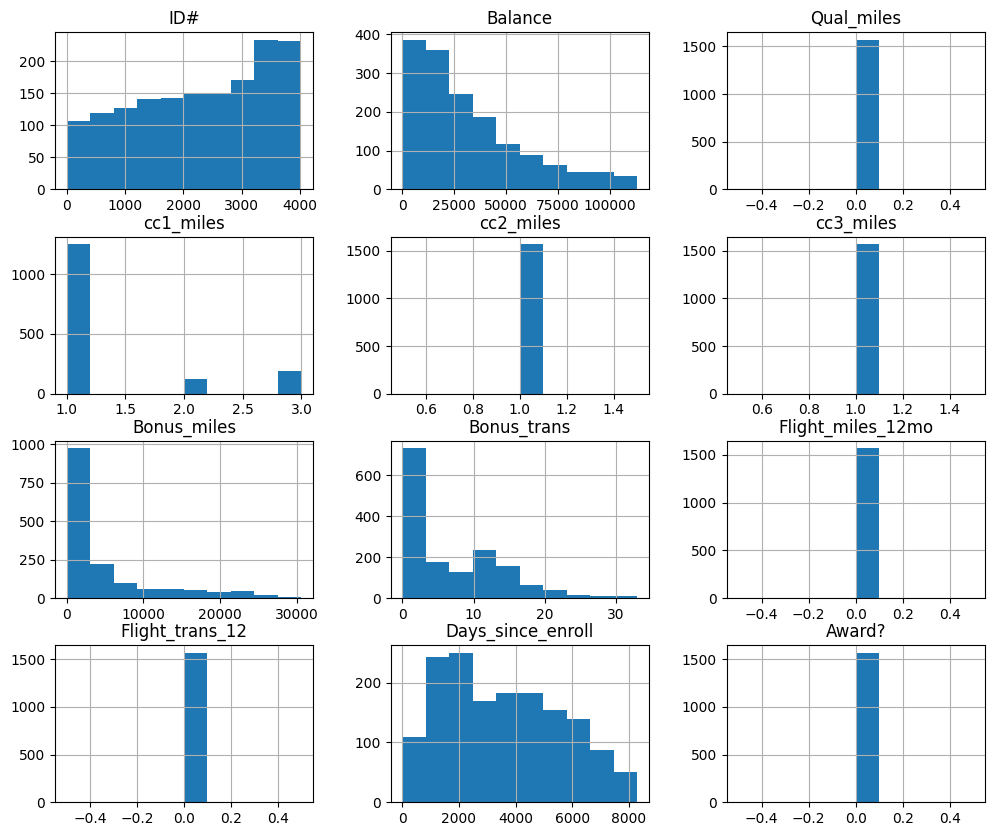

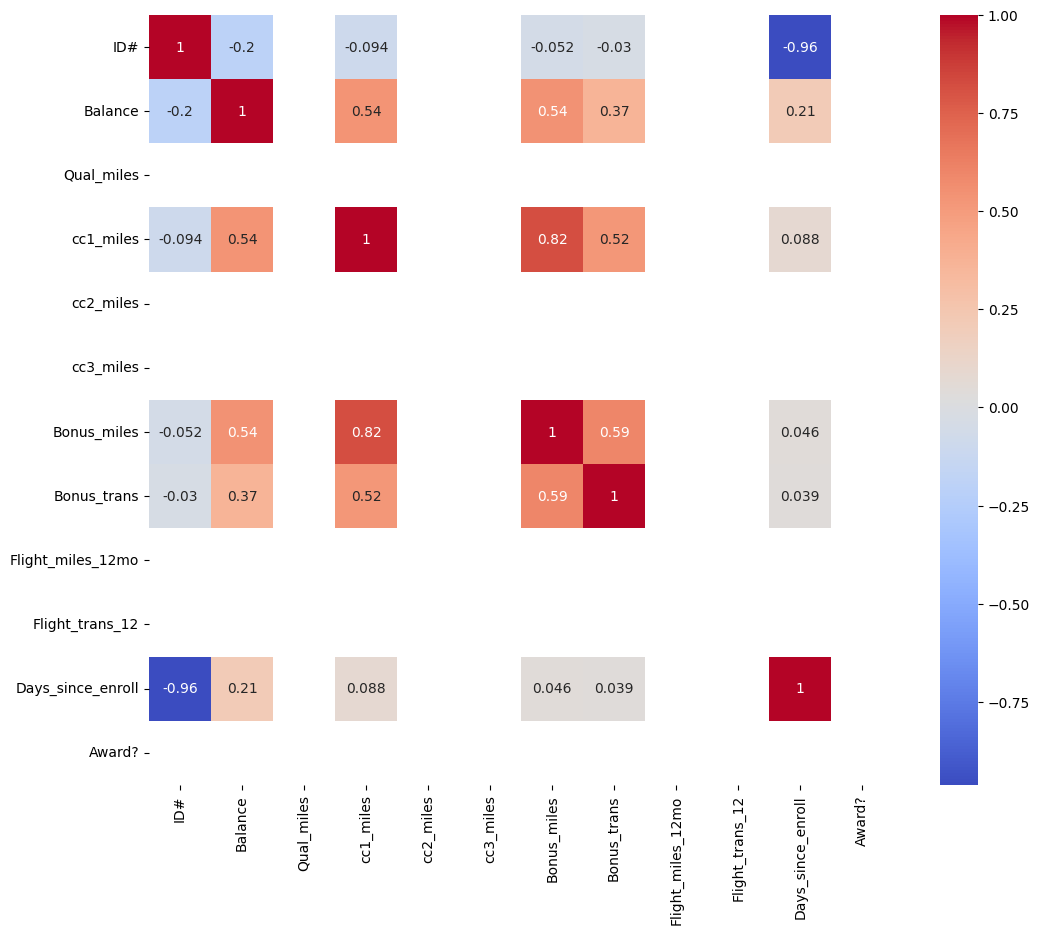

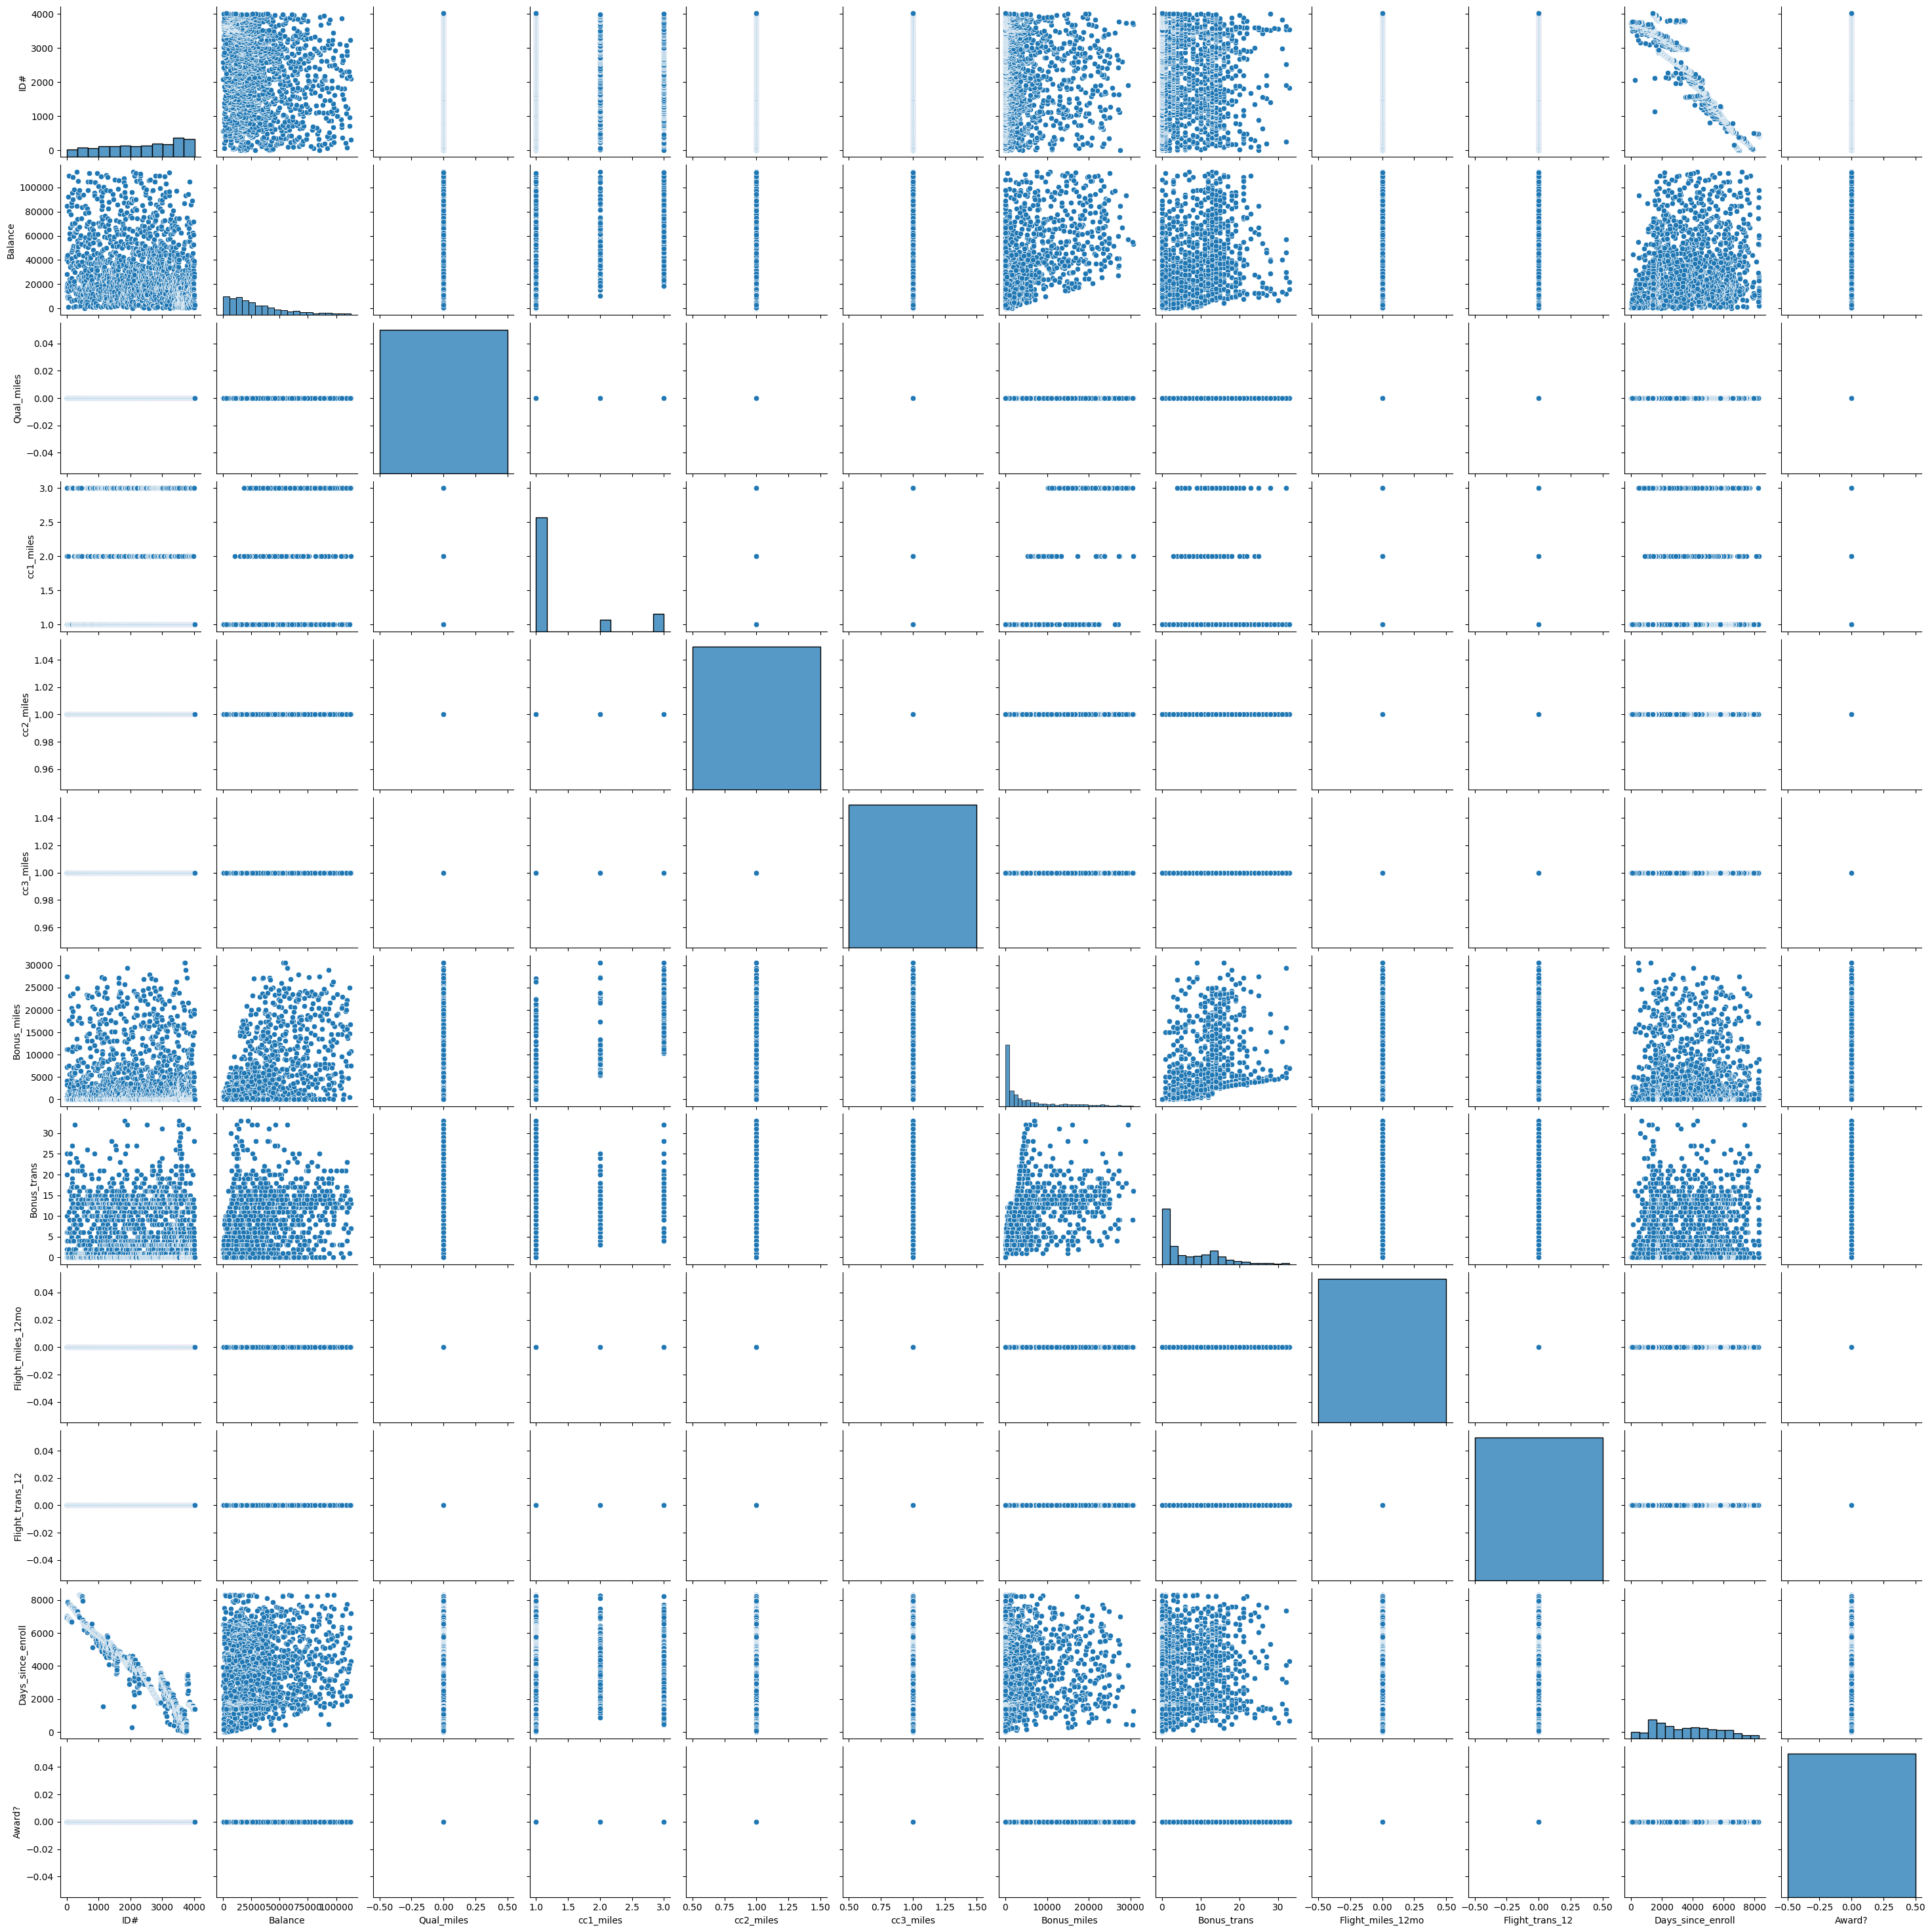

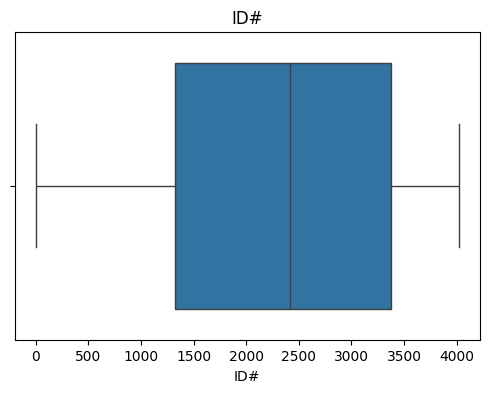

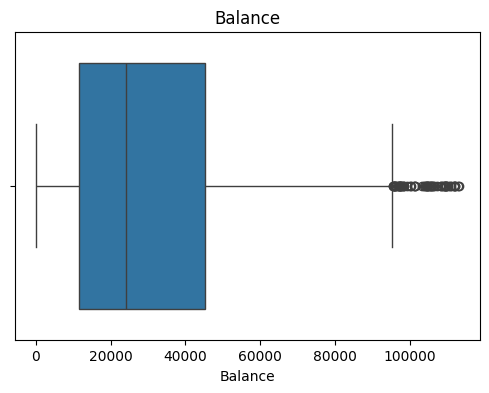

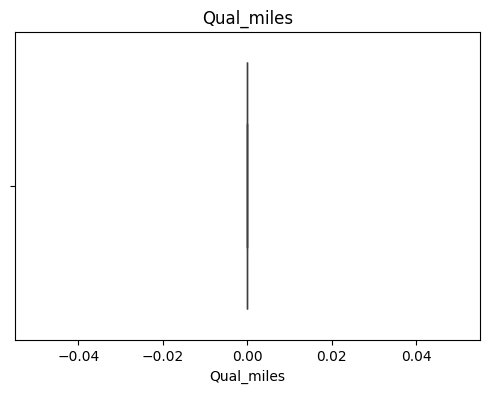

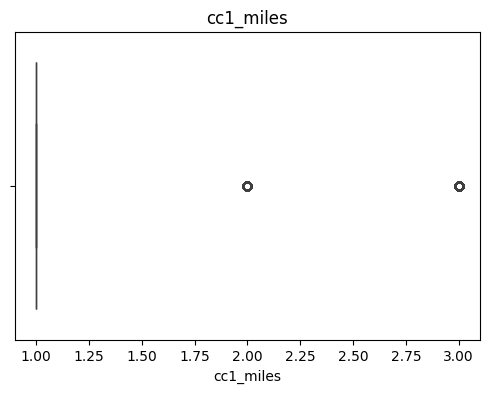

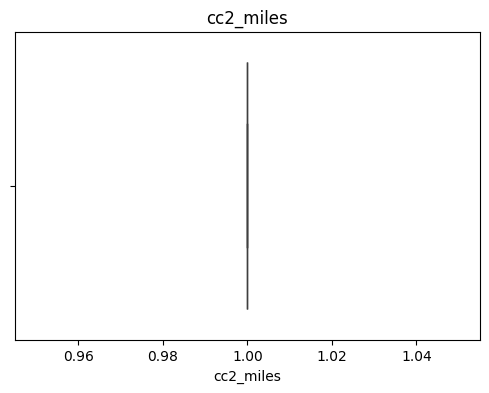

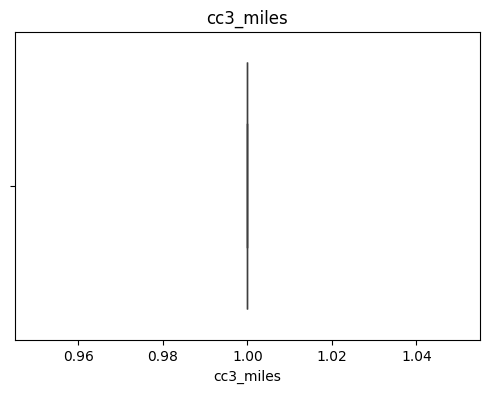

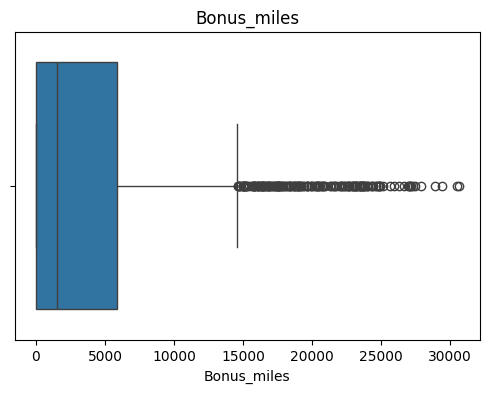

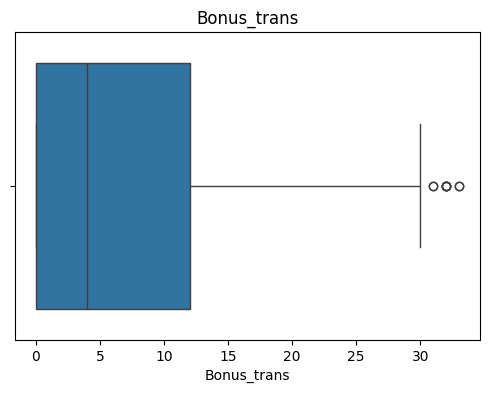

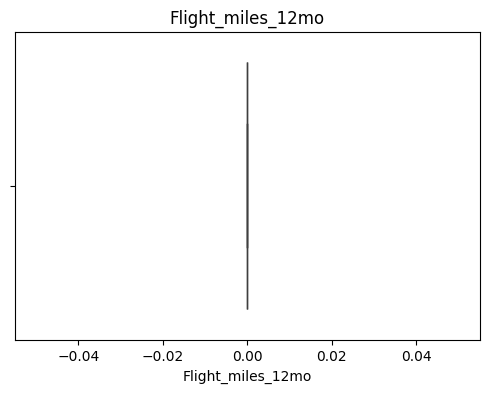

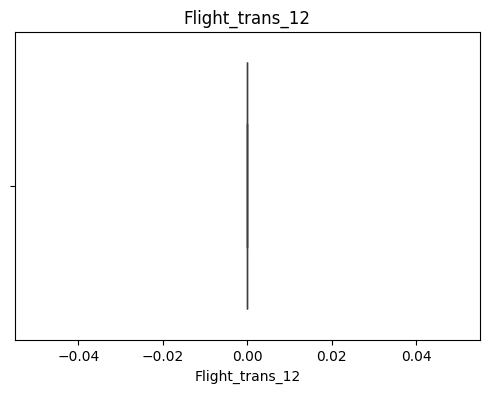

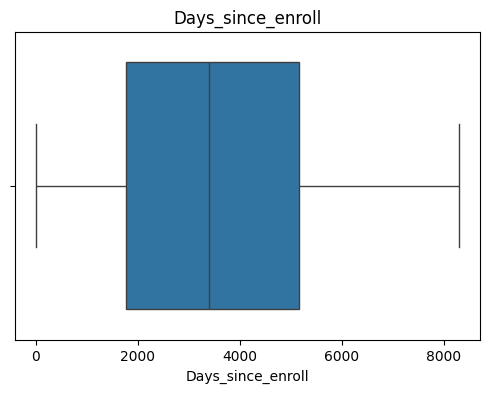

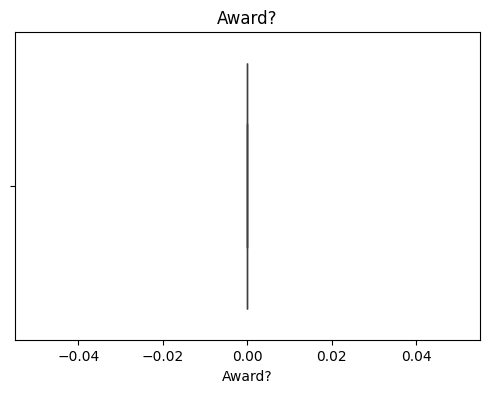

In [23]:
# Perform exploratory data analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

# Data distribution
data.hist(figsize=(12, 10))
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Pairwise scatter plots
sns.pairplot(data)
plt.show()

# Box plots for each feature
for column in data.columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=data[column])
  plt.title(column)
  plt.show()



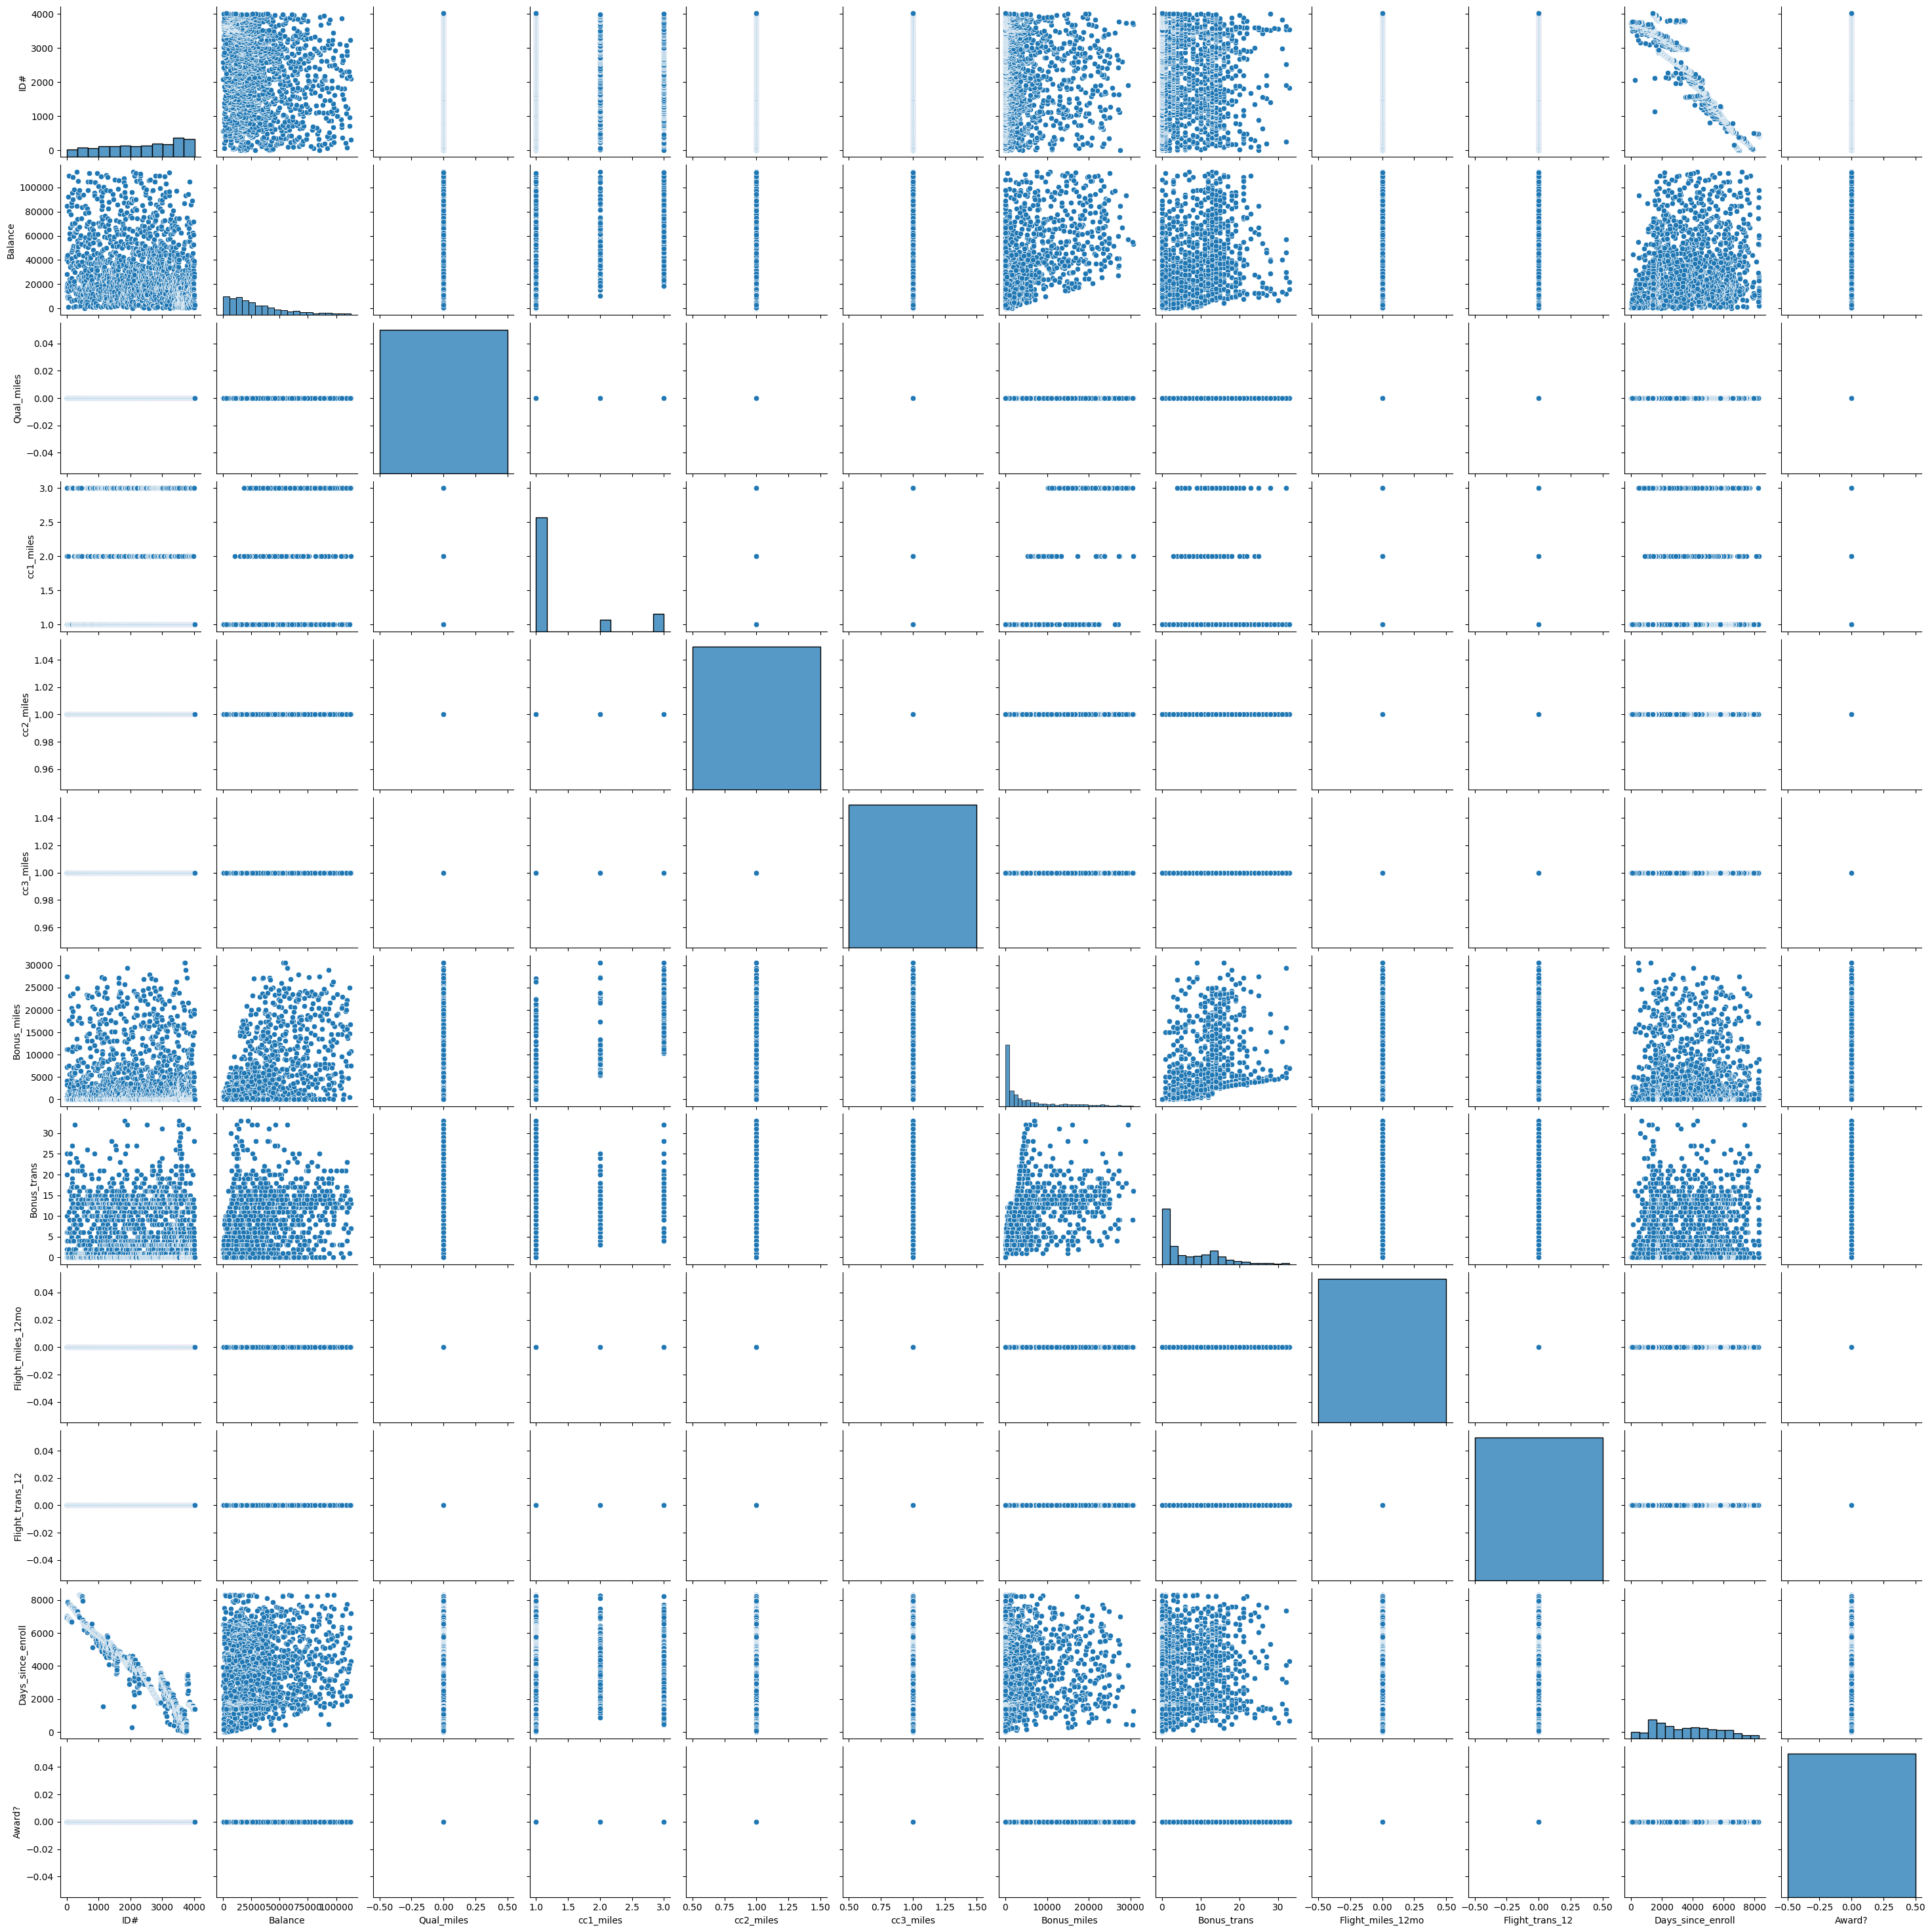

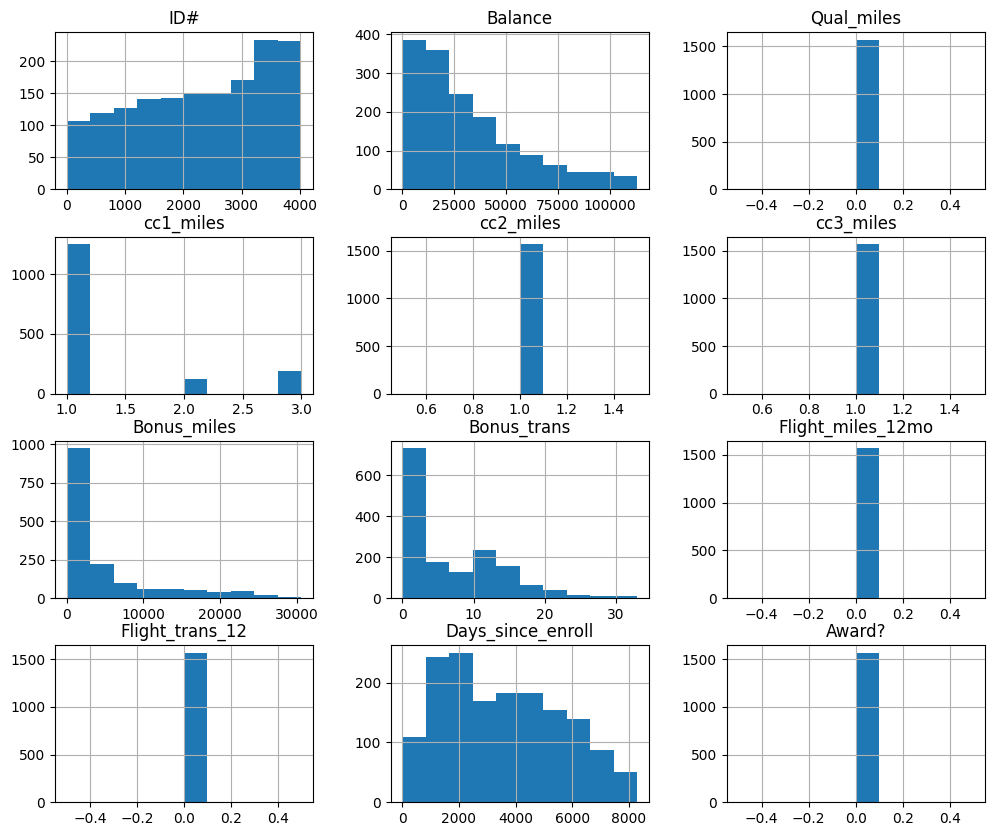

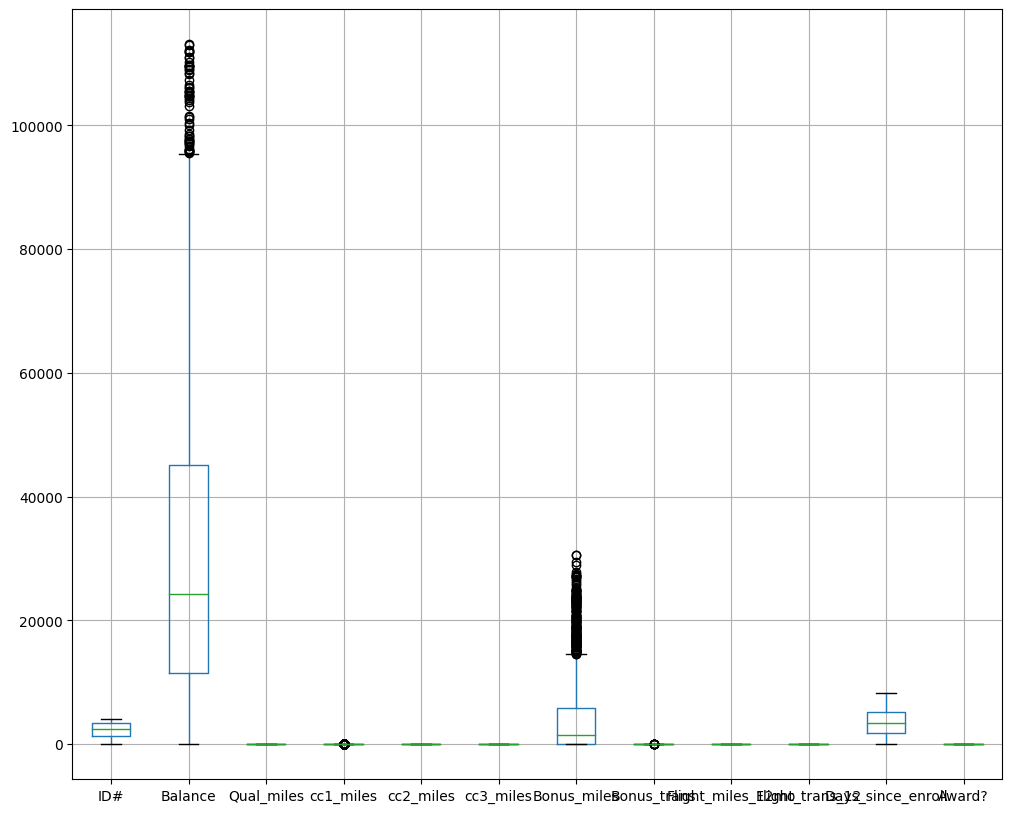

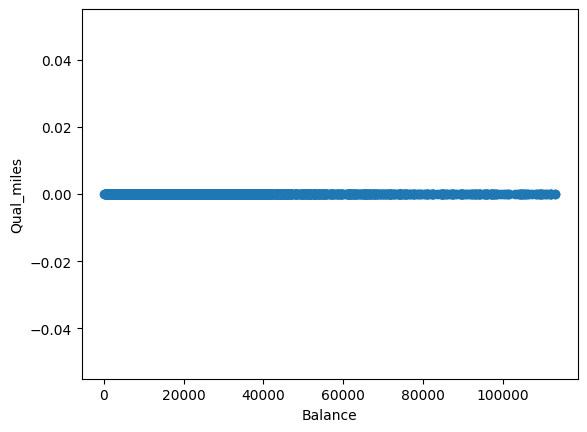

In [24]:
#3.Use multiple visualizations to understand the hidden patterns in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

# Histogram for each feature to understand distribution
data.hist(figsize=(12, 10))
plt.show()

# Boxplot to identify outliers in each feature
data.boxplot(figsize=(12, 10))
plt.show()

# Scatter plot to visualize relationships between specific features
plt.scatter(data['Balance'], data['Qual_miles'])
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

Implementing Clustering Algorithms:

*Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

*Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

*Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


In [11]:
#1Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can experiment with different n_clusters
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate K-Means using silhouette score
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # You can experiment with different n_clusters and linkage criteria
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Evaluate Hierarchical Clustering using silhouette score
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)
print("Hierarchical Silhouette Score:", hierarchical_silhouette)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can experiment with different epsilon and minPts values
dbscan_labels = dbscan.fit_predict(scaled_data)

K-Means Silhouette Score: 0.29177290065580813
Hierarchical Silhouette Score: 0.2526947120975063


DBSCAN Silhouette Score: -0.30425321447976744


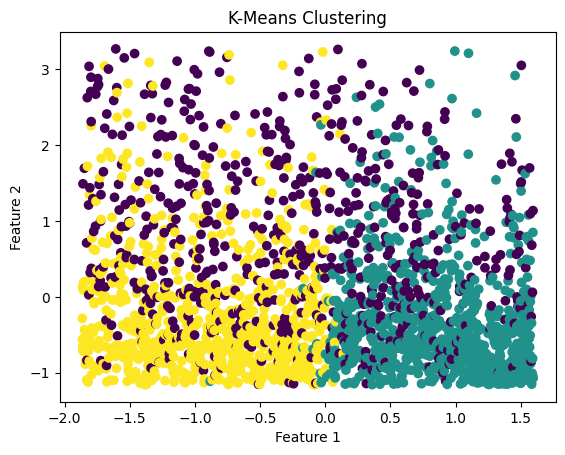

In [12]:
# Evaluate DBSCAN using silhouette score (if applicable, as DBSCAN may not produce a fixed number of clusters)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN did not produce multiple clusters.")

# Visualize the clusters (example using K-Means)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
# prompt: # Visualize the clusters (example using  DBSCAN  )

# Visualize the clusters (example using DBSCAN)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

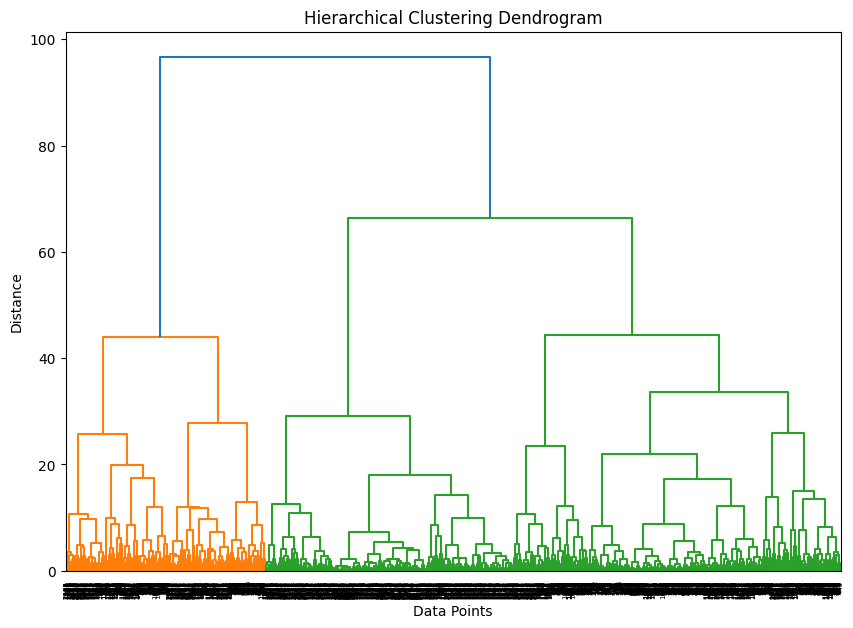

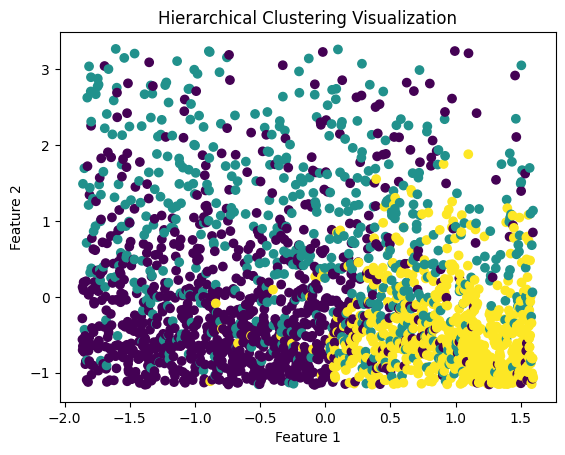

In [14]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Visualize Hierarchical Clustering using Dendrogram
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(scaled_data, method='ward')  # You can change the linkage method
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Visualize clusters using scatter plot (example for hierarchical)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering Visualization')
plt.show()

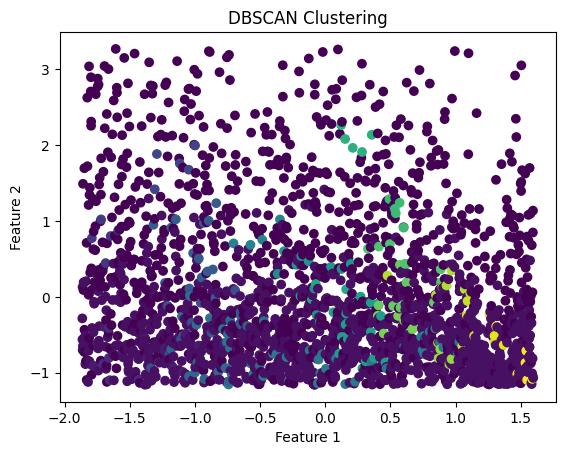

In [15]:
# Visualize the clusters (example using DBSCAN)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

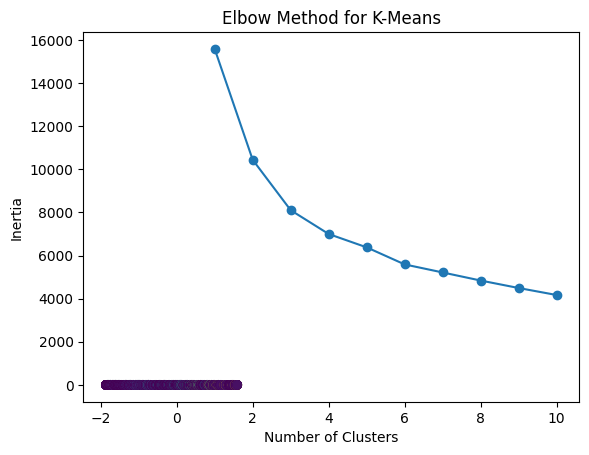

In [13]:
# K-Means: Elbow method for finding optimal k
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

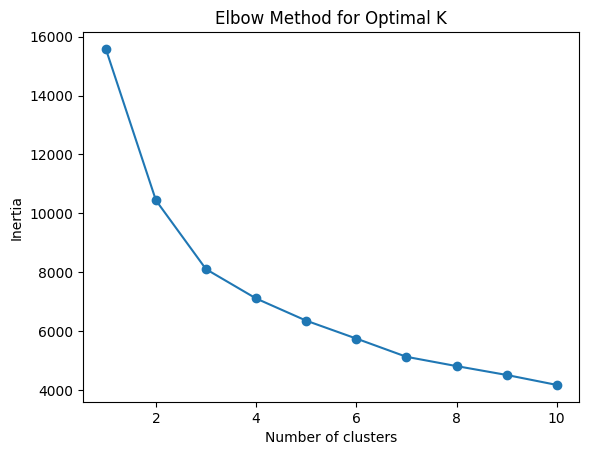

Silhouette score for K-Means: 0.29178993558827443
Silhouette score for Hierarchical (linkage=ward): 0.2526947120975063
Silhouette score for Hierarchical (linkage=complete): 0.20165754422141707
Silhouette score for Hierarchical (linkage=average): 0.2996052751837527
Silhouette score for DBSCAN (eps=0.5, min_samples=5): -0.30425321447976744
Silhouette score for DBSCAN (eps=0.5, min_samples=10): 0.10433678755581896
Silhouette score for DBSCAN (eps=0.5, min_samples=15): 0.023673924006677532
Silhouette score for DBSCAN (eps=1, min_samples=5): 0.19263110191614502
Silhouette score for DBSCAN (eps=1, min_samples=10): 0.18519132572150843
Silhouette score for DBSCAN (eps=1, min_samples=15): 0.07708165588349732
Silhouette score for DBSCAN (eps=1.5, min_samples=5): 0.25595654578518323
Silhouette score for DBSCAN (eps=1.5, min_samples=10): 0.25373103416138726
Silhouette score for DBSCAN (eps=1.5, min_samples=15): 0.24702524454143385


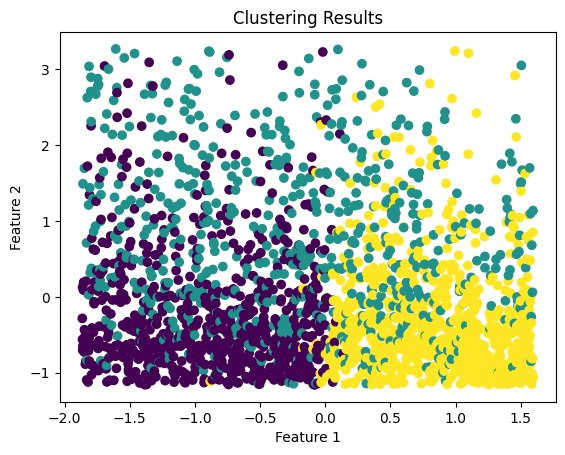

In [16]:
# *Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# K-Means Clustering
inertia = []
for i in range(1, 11):  # Try K values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow method to find optimal K
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choose K based on the elbow curve and fit the model
optimal_k = 3  # Example, replace with your chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate K-Means clustering using Silhouette score
silhouette_avg_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f"Silhouette score for K-Means: {silhouette_avg_kmeans}")

# Hierarchical Clustering
for linkage in ['ward', 'complete', 'average']:
  hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage)
  hierarchical_labels = hierarchical.fit_predict(scaled_data)

  # Evaluate hierarchical clustering using Silhouette score
  silhouette_avg_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
  print(f"Silhouette score for Hierarchical (linkage={linkage}): {silhouette_avg_hierarchical}")


# DBSCAN Clustering
for eps in [0.5, 1, 1.5]:
    for min_samples in [5, 10, 15]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_data)

        # Evaluate DBSCAN clustering using Silhouette score (if applicable)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        if n_clusters > 1:
            silhouette_avg_dbscan = silhouette_score(scaled_data, dbscan_labels)
            print(f"Silhouette score for DBSCAN (eps={eps}, min_samples={min_samples}): {silhouette_avg_dbscan}")

# Visualize the clustering results (using the chosen clustering algorithm)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels) #Example with K-Means labels
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Cluster Analysis and Interpretation:

Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


In [17]:
# Cluster Analysis and Interpretation (K-Means Example)
# Assuming kmeans_labels contains the cluster assignments for each data point
cluster_data = pd.DataFrame(data)
cluster_data['cluster'] = kmeans_labels

# Analyze the characteristics of each cluster
for cluster_num in cluster_data['cluster'].unique():
  cluster_subset = cluster_data[cluster_data['cluster'] == cluster_num]
  # print(f"Cluster {cluster_num}:")
  # print(cluster_subset.describe()) # Provides summary statistics for each cluster

  # we can also analyze specific features within each cluster to understand the characteristics
  # Example: Compare average Balance in different clusters
  # print(f"Average Balance in Cluster {cluster_num}: {cluster_subset['Balance'].mean()}")

  # we can also visualize the clusters based on different feature combinations
  # plt.scatter(cluster_subset['Balance'], cluster_subset['Qual_miles'], label=f'Cluster {cluster_num}')

In [18]:
# Example Insights (replace with your findings):
# Cluster 0: Might represent customers with low balance and fewer miles traveled.
# Cluster 1: Might be a group of customers with average balance and miles.
# Cluster 2: Could be customers with high balances and frequent flyer miles.

# plt.xlabel('Balance')
# plt.ylabel('Qual_miles')
# plt.title('Cluster Visualization')
# plt.legend()
# plt.show()

# Perform similar analysis for hierarchical and DBSCAN clusters, analyzing the features and characteristics of each cluster.
# Consider comparing the clusters across different algorithms and see if there are any consistent patterns.


# Example Interpretation for Hierarchical Clustering:
# Look at the dendrogram to identify natural groupings of data points.
# Each cluster formed at different levels of the dendrogram represents a different level of similarity between the data points.
# we can analyze the characteristics of data points within each cluster to understand what defines those clusters.


# Example Interpretation for DBSCAN:
# Analyze the core points, border points, and noise points.
# The clusters are represented by groups of densely connected points.
# we can understand the characteristics of clusters by looking at the features of the core points and their relationship to other data points in the cluster.

# Note: Replace the example analysis with your actual insights derived from your data.

Visualization:

Visualize the clustering results using scatter plots or other suitable visualization techniques.

Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


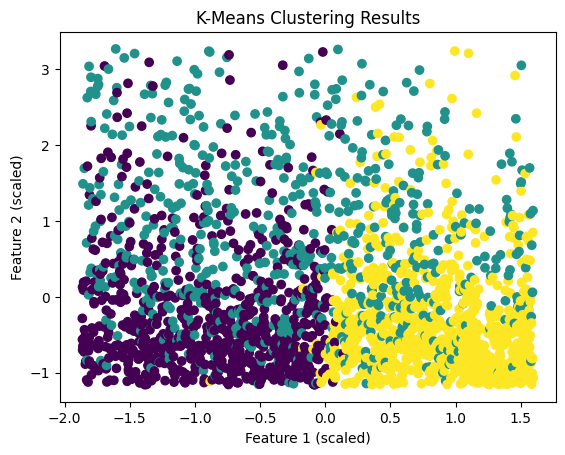

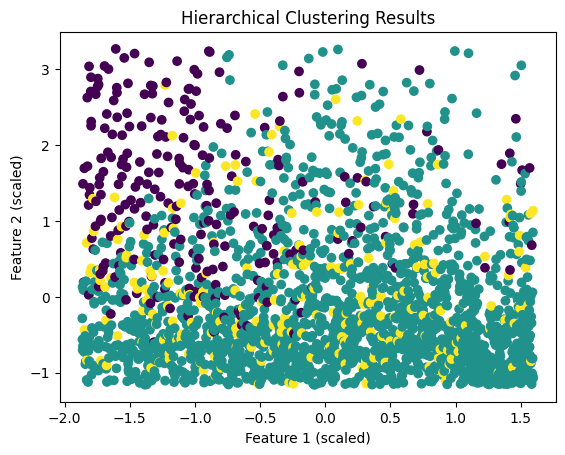

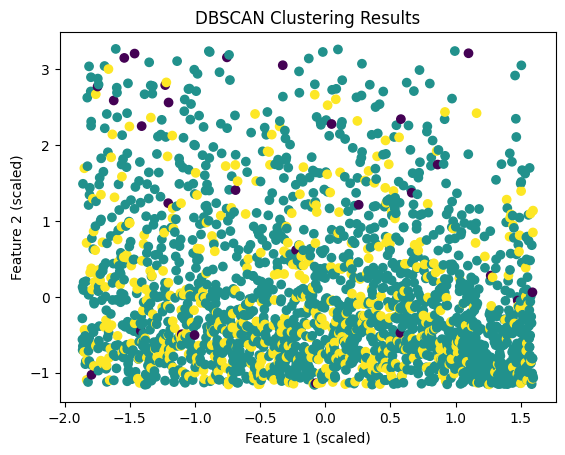

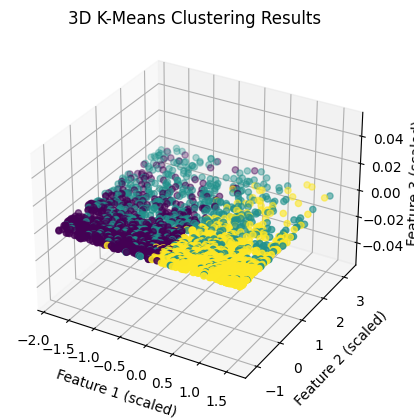

In [19]:
# Visualize the clustering results (using the chosen clustering algorithm)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels)  # Example with K-Means labels
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

# Visualize hierarchical clustering results
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

# Visualize DBSCAN clustering results
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


# 3D scatter plot for visualizing clusters in 3 dimensions (if we  have more features)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=kmeans_labels)  # Example with K-Means labels
ax.set_xlabel('Feature 1 (scaled)')
ax.set_ylabel('Feature 2 (scaled)')
ax.set_zlabel('Feature 3 (scaled)')
ax.set_title('3D K-Means Clustering Results')
plt.show()

Evaluation and Performance Metrics:

Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [21]:
# Evaluate K-Means clustering using Silhouette score
silhouette_avg_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f"Silhouette score for K-Means: {silhouette_avg_kmeans}")

# Evaluate hierarchical clustering using Silhouette score
silhouette_avg_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
print(f"Silhouette score for Hierarchical: {silhouette_avg_hierarchical}")

# Evaluate DBSCAN clustering using Silhouette score (if applicable)
if len(set(dbscan_labels)) > 1:
    silhouette_avg_dbscan = silhouette_score(scaled_data, dbscan_labels)
    print(f"Silhouette score for DBSCAN: {silhouette_avg_dbscan}")
else:
    print("DBSCAN did not produce multiple clusters.")

Silhouette score for K-Means: 0.29178993558827443
Silhouette score for Hierarchical: 0.2996052751837527
Silhouette score for DBSCAN: 0.24702524454143385
